In [1]:
import matplotlib.pyplot as plt
from nmf_son.base import nmf_son
from nmf_son.andersen_acceleration import nmf_son_z_accelerated, nmf_son_all_accelerated
from nmf_son.unnamed_acceleration import nmf_son_acc
from nmf_son.utils import *


np.random.seed(42)
np.set_printoptions(precision=3)

In [2]:
def plot_scores(base_scores, scores_arr, ver_names):
    fig, axs = plt.subplots(2, len(scores_arr), figsize=(20, 10), sharey='row')

    scores_arr = np.array(scores_arr)
    min_val = np.min(scores_arr[~np.isnan(scores_arr)])

    for idx in range(len(scores_arr)):
        axs[0, idx].set_yscale('log')
        axs[0, idx].set_title(ver_names[idx], fontsize=16)
        axs[0, idx].plot(base_scores, color='black', linewidth=3, label='base')
        axs[0, idx].plot(scores_arr[idx], color='cyan', linewidth=1.5, label=ver_names[idx])
        axs[0, idx].legend()

        axs[1, idx].set_yscale('log')
        axs[1, idx].plot(scores_arr[idx] - min_val, color='cyan', linewidth=1.5, label=ver_names[idx])
        axs[1, idx].legend()

In [3]:
X = np.load('datasets/urban_small.npz')['X']
rank = 6

data = np.load(f'saved_models/urban_small_r6_ini.npz')
ini_W = data['W']
ini_H = data['H']

reg = 2
save_filepath = 'saved_models/acc_test/urban_small_r{}_l{}_{}.npz'

In [4]:
aa_size = 2
max_iter = 1000

In [5]:
%%time
Wb_base, Hb_base, Wl_base, Hl_base, fscores_base, gscores_base, lambda_vals_base = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=max_iter, verbose=True)

Iteration: 1, f=16558825.845404623, g=3437.5535512373085,  total=19590501.299049553
Iteration: 2, f=29715643.491713535, g=32633.44987436466,  total=344108775.20589155
Iteration: 3, f=4410520.353664909, g=9180.818202618815,  total=21130414.92328962
Iteration: 4, f=2276673.595638311, g=5821.362576428308,  total=7869908.874401683
Iteration: 5, f=1663622.1735117265, g=4425.322633534158,  total=5125016.326400697
Iteration: 6, f=1349087.382871435, g=3740.9239836589054,  total=4161756.4712115843
Iteration: 7, f=1129987.9882863078, g=3366.143569808882,  total=3557849.0401547384
Iteration: 8, f=965881.0499840776, g=3112.7083172644693,  total=3055704.5745032276
Iteration: 9, f=839782.5688712142, g=2917.654062909947,  total=2650493.0386851006
Iteration: 10, f=742039.6255402965, g=2756.723823633268,  total=2328964.3015728546
Iteration: 11, f=665011.1489881132, g=2621.2663208962513,  total=2076167.001833533
Iteration: 12, f=603344.937018311, g=2506.8166049109427,  total=1875295.8085835576
Iteration

In [6]:
%%time
Wb_acc, Hb_acc, Wl_acc, Hl_acc, fscores_acc, gscores_acc, lambda_vals_acc = nmf_son_acc(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=max_iter, verbose=True)

Iteration: 1, f=23028010.039202657, g=1468.200327102833,  total=24322857.327067886
Iteration: 2, f=4899623.353517258, g=59229.92071759525,  total=1862884782.091913
Iteration: 3, f=2933377.259796535, g=666.0678770604275,  total=3043574.325263937
Iteration: 4, f=7374732.300164488, g=14835.921893857954,  total=138050170.67628145
Iteration: 5, f=4948701.010691211, g=3810.7470767331633,  total=8737240.712585457
Iteration: 6, f=756483.0772740098, g=4967.434507207457,  total=13658073.065467943
Iteration: 7, f=969571.8679989224, g=1347.61659024353,  total=1380024.8467724817
Iteration: 8, f=545115.2830334435, g=2752.775060338777,  total=4506202.2520669615
Iteration: 9, f=508770.0935495743, g=1215.0548770574937,  total=989989.9307612994
Iteration: 10, f=415759.4490484474, g=1746.1807904968318,  total=1878087.745342353
Iteration: 11, f=391530.9888133223, g=1220.0861441886138,  total=972527.3505419083
Iteration: 12, f=368728.5639795403, g=1425.16833050363,  total=1283414.0856950574
Iteration: 13, 

In [7]:
%%time
Wb_z2, Hb_z2, Wl_z2, Hl_z2, fscores_z2, gscores_z2, lambda_vals_z2 = nmf_son_z_accelerated(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=max_iter, andersen_win=aa_size, verbose=True)

Iteration: 1, f=16553225.446518863, g=3437.7132056069076,  total=19585041.70385635
Iteration: 2, f=18635479.236474488, g=36698.170525911075,  total=372052447.9349753
Iteration: 3, f=1882593.1824618885, g=6585.32648848466,  total=8570703.96743485
Iteration: 4, f=1077882.7110697504, g=4626.556447099692,  total=3723134.587591124
Iteration: 5, f=905398.6105240572, g=3542.541682976814,  total=2556062.328554931
Iteration: 6, f=798289.313011428, g=2972.25859562811,  total=2317581.981059049
Iteration: 7, f=719882.1039397549, g=2598.716202596259,  total=2115808.6731377738
Iteration: 8, f=636633.6114436226, g=2382.299896807133,  total=1956496.904107613
Iteration: 9, f=546344.883354537, g=2245.746394891161,  total=1746628.3906343956
Iteration: 10, f=374752.8755153257, g=2136.010741477435,  total=1414049.691978064
Iteration: 11, f=321546.55870085285, g=2050.136093871556,  total=1040919.7167634473
Iteration: 12, f=294226.25275461964, g=1988.7205396074219,  total=918054.3465480194
Iteration: 13, f=2

In [8]:
%%time
Wb_all2, Hb_all2, Wl_all2, Hl_all2, fscores_all2, gscores_all2, lambda_vals_all2 = nmf_son_all_accelerated(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=max_iter, andersen_win=aa_size, verbose=True)

Iteration: 1, f=16726933.526107311, g=3438.4071200329245,  total=19759361.76615312
Iteration: 2, f=30407426.212447807, g=33066.23499551602,  total=352124253.4643315
Iteration: 3, f=4393139.500713394, g=9261.088002402686,  total=21425973.75706177
Iteration: 4, f=2272169.864746529, g=5821.298282003277,  total=7795014.571862752
Iteration: 5, f=1660367.522590228, g=4425.918674235908,  total=5115417.77023259
Iteration: 6, f=1350125.0075476838, g=3742.6499712403775,  total=4158208.4442563755
Iteration: 7, f=1128053.4544865272, g=3373.0810348386394,  total=3561666.5856184065
Iteration: 8, f=960281.3314896264, g=3120.8841211107374,  total=3047704.71533936
Iteration: 9, f=835008.2618654966, g=2923.6022237858174,  total=2634165.505296811
Iteration: 10, f=737562.107693881, g=2761.7222452315477,  total=2315109.7460042103
Iteration: 11, f=661096.6771849911, g=2626.4336427106196,  total=2063958.9212651139
Iteration: 12, f=600482.8313847862, g=2512.196899941569,  total=1865167.380027536
Iteration: 13

In [9]:
save_results(save_filepath.format(rank, reg, 'base'), Wb_base, Hb_base, Wl_base, Hl_base, fscores_base, gscores_base, lambda_vals_base)
save_results(save_filepath.format(rank, reg, 'z2'), Wb_z2, Hb_z2, Wl_z2, Hl_z2, fscores_z2, gscores_z2, lambda_vals_z2)
save_results(save_filepath.format(rank, reg, 'all2'), Wb_all2, Hb_all2, Wl_all2, Hl_all2, fscores_all2, gscores_all2, lambda_vals_all2)
save_results(save_filepath.format(rank, reg, 'her'), Wb_acc, Hb_acc, Wl_acc, Hl_acc, fscores_acc, gscores_acc, lambda_vals_acc)
# # Wb_base, Hb_base, Wl_base, Hl_base, fscores_base, gscores_base, lambda_vals_base = load_results(acc_filepath.format(rank, iters, reg, 'base'))
# Wb_z2, Hb_z2, Wl_z2, Hl_z2, fscores_z2, gscores_z2, lambda_vals_z2 = load_results(acc_filepath.format(rank, iters, reg, 'z2'))
# Wb_all2, Hb_all2, Wl_all2, Hl_all2, fscores_all2, gscores_all2, lambda_vals_all2 = load_results(acc_filepath.format(rank, iters, reg, 'all2'))
# Wb_acc, Hb_acc, Wl_acc, Hl_acc, fscores_acc, gscores_acc, lambda_vals_acc = load_results(acc_filepath.format(rank, iters, reg, 'her'))

In [10]:
total_scores_base = fscores_base + lambda_vals_base * gscores_base
total_scores_z2 = fscores_z2 + lambda_vals_z2 * gscores_z2
total_scores_all2 = fscores_all2+ lambda_vals_all2 * gscores_all2
total_scores_acc = fscores_acc + lambda_vals_acc * gscores_acc

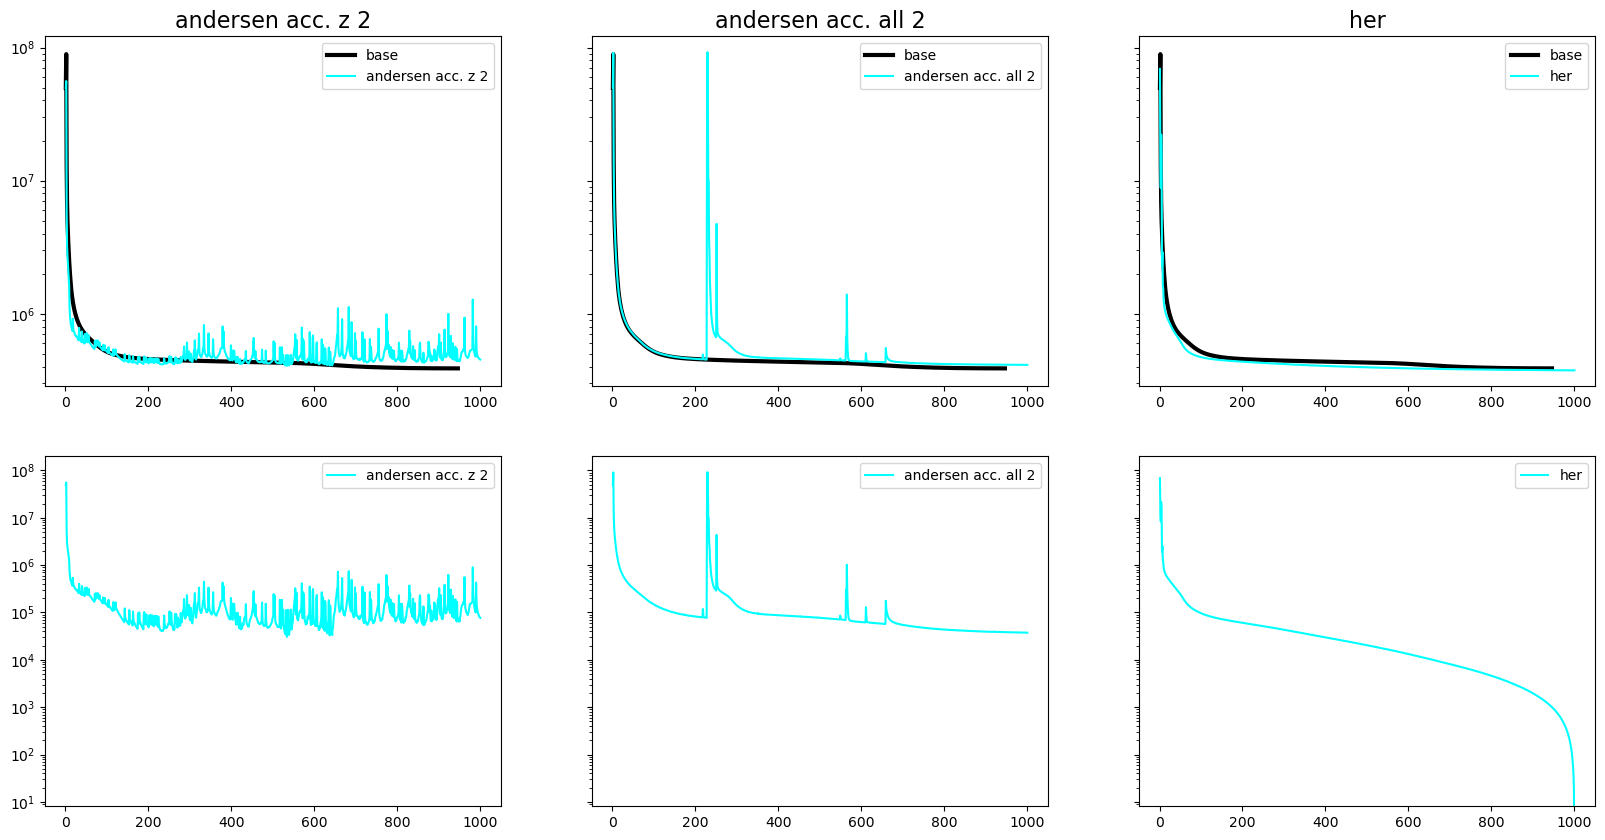

In [11]:
plot_scores(total_scores_base, [total_scores_z2, total_scores_all2, total_scores_acc], ['andersen acc. z 2', 'andersen acc. all 2', 'her'])

In [12]:
Wb_z3, Hb_z3, Wl_z3, Hl_z3, fscores_z3, gscores_z3, lambda_vals_z3 = nmf_son_z_accelerated(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=max_iter, andersen_win=3)
Wb_z4, Hb_z4, Wl_z4, Hl_z4, fscores_z4, gscores_z4, lambda_vals_z4 = nmf_son_z_accelerated(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=max_iter, andersen_win=4)

LinAlgError: Singular matrix

In [ ]:
save_results(save_filepath.format(rank, reg, 'z3'), Wb_z3, Hb_z3, Wl_z3, Hl_z3, fscores_z3, gscores_z3, lambda_vals_z3)
save_results(save_filepath.format(rank, reg, 'z4'), Wb_z4, Hb_z4, Wl_z4, Hl_z4, fscores_z4, gscores_z4, lambda_vals_z4)
# Wb_z3, Hb_z3, Wl_z3, Hl_z3, fscores_z3, gscores_z3, lambda_vals_z3 = load_results(acc_filepath.format(rank, iters, reg, 'z3'))
# Wb_z4, Hb_z4, Wl_z4, Hl_z4, fscores_z4, gscores_z4, lambda_vals_z4 = load_results(acc_filepath.format(rank, iters, reg, 'z4'))

In [ ]:
total_scores_z3 = fscores_z3 + lambda_vals_z3 * gscores_z3
total_scores_z4 = fscores_z4 + lambda_vals_z4 * gscores_z4

In [ ]:
plot_scores(total_scores_base, [total_scores_z2, total_scores_z3, total_scores_z4], ['andersen acc. z 2', 'andersen acc. z 3', 'andersen acc. z 4'])

In [ ]:
Wb_all3, Hb_all3, Wl_all3, Hl_all3, fscores_all3, gscores_all3, lambda_vals_all3 = nmf_son_all_accelerated(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=max_iter, andersen_win=3)
Wb_all4, Hb_all4, Wl_all4, Hl_all4, fscores_all4, gscores_all4, lambda_vals_all4 = nmf_son_all_accelerated(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=max_iter, andersen_win=4)

In [ ]:
save_results(save_filepath.format(rank, reg, 'all3'), Wb_all3, Hb_all3, Wl_all3, Hl_all3, fscores_all3, gscores_all3, lambda_vals_all3)
save_results(save_filepath.format(rank, reg, 'all4'), Wb_all4, Hb_all4, Wl_all4, Hl_all4, fscores_all4, gscores_all4, lambda_vals_all4)
# Wb_all3, Hb_all3, Wl_all3, Hl_all3, fscores_all3, gscores_all3, lambda_vals_all3 = load_results(acc_filepath.format(rank, iters, reg, 'all3'))
# Wb_all4, Hb_all4, Wl_all4, Hl_all4, fscores_all4, gscores_all4, lambda_vals_all4 = load_results(acc_filepath.format(rank, iters, reg, 'all4'))

In [ ]:
total_scores_all3 = fscores_all3 + lambda_vals_all3 * gscores_all3
total_scores_all4 = fscores_all4 + lambda_vals_all4 * gscores_all4

In [ ]:
plot_scores(total_scores_base, [total_scores_all2, total_scores_all3, total_scores_all4], ['andersen acc. all 2', 'andersen acc. all 3', 'andersen acc. all 4'])